## Importing Data

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from dateutil import parser

In [294]:
df = pd.read_csv('reviews_data.csv')

## Cleaning Data and EDA

In [295]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [296]:
df.drop('Image_Links', axis="columns", inplace=True)

In [297]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      850 non-null    object 
 1   location  850 non-null    object 
 2   Date      850 non-null    object 
 3   Rating    705 non-null    float64
 4   Review    850 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.3+ KB


In [299]:
df['Review'].value_counts()

No Review Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       37
Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And thei

In [300]:
df = df[df['Review'] != 'No Review Text']
print(df['Review'].value_counts())
df.reset_index(drop=True, inplace=True)

Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
I was calling starbucks, I was 45min in hold but still no one responded me. I have ordered 10$ by seeing an offer saying that if we give 10$ gift card you going to add 10$ more 

In [301]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [302]:
df['Rating'].value_counts()

1.0    450
2.0     98
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64

In [303]:
df['Date'] = df['Date'].str.replace('Reviewed', '').str.replace('[.,]', '')
df['Date'] = df['Date'].apply(parser.parse)



/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_50143/175631065.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Date'] = df['Date'].str.replace('Reviewed', '').str.replace('[.,]', '')


In [304]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [305]:
df['Date'] = pd.to_datetime(df['Date'])

In [306]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [307]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.head()

,name,location,Date,Rating,Review,year,month,day
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...,2023,7,16
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...,2023,1,22


In [308]:
df.drop('Date', inplace=True, axis=1)
df.head()

,name,location,Rating,Review,year,month,day
0,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,Courtney,"Apopka, FL",5.0,** at the Starbucks by the fire station on 436...,2023,7,16
2,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,Tenessa,"Gresham, OR",5.0,I’m on this kick of drinking 5 cups of warm wa...,2023,1,22


In [309]:
df.columns = ['name', 'location', 'rating', 'review', 'year', 'month', 'day']
df.head()

,name,location,rating,review,year,month,day
0,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,Courtney,"Apopka, FL",5.0,** at the Starbucks by the fire station on 436...,2023,7,16
2,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,Tenessa,"Gresham, OR",5.0,I’m on this kick of drinking 5 cups of warm wa...,2023,1,22


In [310]:
def cleaning(string):
    return ''.join(char for char in string if char.isalnum() or char.isspace())

In [311]:
df['review'] = df['review'].apply(cleaning)
df.head()

,name,location,rating,review,year,month,day
0,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,Courtney,"Apopka, FL",5.0,at the Starbucks by the fire station on 436 i...,2023,7,16
2,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,Tenessa,"Gresham, OR",5.0,Im on this kick of drinking 5 cups of warm wat...,2023,1,22


<Axes: xlabel='year'>

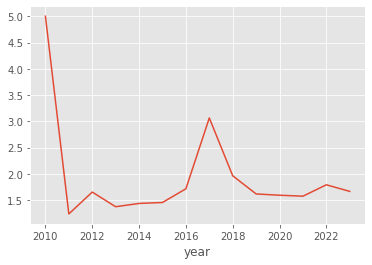

In [312]:
df.groupby('year')['rating'].mean().sort_index().plot()

In [313]:
df[df['year'] == 2010]['rating'].value_counts()

5.0    1
Name: rating, dtype: int64

In [314]:
df = df[~df['year'].isin([2010, 2004, 2006, 2007])]


In [315]:
df.groupby('year').count()

,name,location,rating,review,month,day
year,,,,,,
2008,15,15,0,15,15,15
2009,38,38,0,38,38,38
2011,26,26,21,26,26,26
2012,52,52,52,52,52,52
2013,24,24,24,24,24,24
2014,64,64,64,64,64,64
2015,90,90,90,90,90,90
2016,60,60,60,60,60,60
2017,124,124,124,124,124,124


<Axes: xlabel='year'>

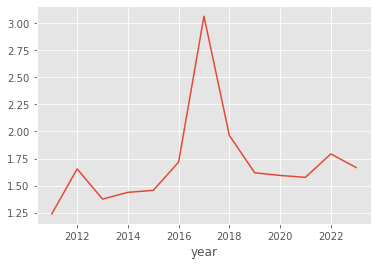

In [316]:
df.groupby('year')['rating'].mean().sort_index().plot()

In [317]:
df.shape

(760, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

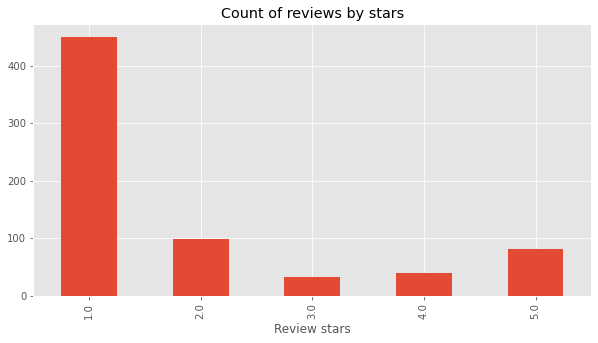

In [318]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar', 
                                                  figsize=(10, 5),
                                                  title='Count of reviews by stars',
                                                  )

ax.set_xlabel('Review stars')
plt.show

In [319]:
df.reset_index(inplace=True)
df = df.rename(columns={"index":"New_ID"})

In [320]:
df.head()

,New_ID,name,location,rating,review,year,month,day
0,0,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,1,Courtney,"Apopka, FL",5.0,at the Starbucks by the fire station on 436 i...,2023,7,16
2,2,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,3,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,4,Tenessa,"Gresham, OR",5.0,Im on this kick of drinking 5 cups of warm wat...,2023,1,22


## Sentiment Analysis

In [321]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [322]:
sia

In [323]:
example = df['review'][33]
example

'On 01232023 I purchased Starbucks beverage located in Las Vegas Upon receiving the beverage Caramel Macchiato it was drowned in Caramel Sauce Caramel was thrown in the cup and to top it off an excessive amount of Caramel was put on top I requested the beverage to be made again Upon departing property I realized that the steaming wand was never wiped down I returned home and contacted Starbucks via email to leave a complaint I was contacted back and was informed that I would be receiving a full refund for the purchase On 02042023 I received the gift card through Mail Looked to see how much was refund and showed 10 cents Due to the lack customer service I will be taking my business elsewhere'

In [324]:
sia.polarity_scores(example)

{'neg': 0.077, 'neu': 0.871, 'pos': 0.052, 'compound': -0.4767}

In [325]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['New_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/760 [00:00<?, ?it/s]

In [326]:
vaders = pd.DataFrame(res).T
vaders.head()

,neg,neu,pos,compound
0,0.000,0.797,0.203,0.8991
1,0.101,0.757,0.142,0.7344
2,0.088,0.773,0.139,0.4215
3,0.086,0.691,0.223,0.9232
4,0.000,0.669,0.331,0.9793


In [327]:
vaders = vaders.reset_index().rename(columns={'index': "New_ID"})
vaders.head()

,New_ID,neg,neu,pos,compound
0,0,0.000,0.797,0.203,0.8991
1,1,0.101,0.757,0.142,0.7344
2,2,0.088,0.773,0.139,0.4215
3,3,0.086,0.691,0.223,0.9232
4,4,0.000,0.669,0.331,0.9793


In [328]:
df.head()

,New_ID,name,location,rating,review,year,month,day
0,0,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,1,Courtney,"Apopka, FL",5.0,at the Starbucks by the fire station on 436 i...,2023,7,16
2,2,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,3,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,4,Tenessa,"Gresham, OR",5.0,Im on this kick of drinking 5 cups of warm wat...,2023,1,22


In [329]:
vaders = vaders.merge(df, how='left')

In [332]:
vaders.head()

,New_ID,neg,neu,pos,compound,name,location,rating,review,year,month,day
0,0,0.000,0.797,0.203,0.8991,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,1,0.101,0.757,0.142,0.7344,Courtney,"Apopka, FL",5.0,at the Starbucks by the fire station on 436 i...,2023,7,16
2,2,0.088,0.773,0.139,0.4215,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,3,0.086,0.691,0.223,0.9232,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,4,0.000,0.669,0.331,0.9793,Tenessa,"Gresham, OR",5.0,Im on this kick of drinking 5 cups of warm wat...,2023,1,22


<Axes: xlabel='rating', ylabel='compound'>

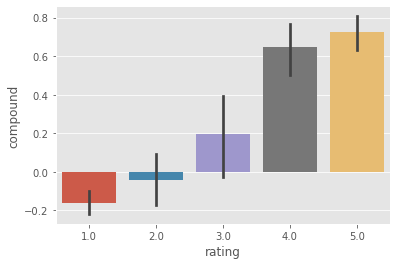

In [333]:
sns.barplot(data=vaders,
            x = 'rating',
            y = 'compound')

Text(0.5, 1.0, 'Negative')

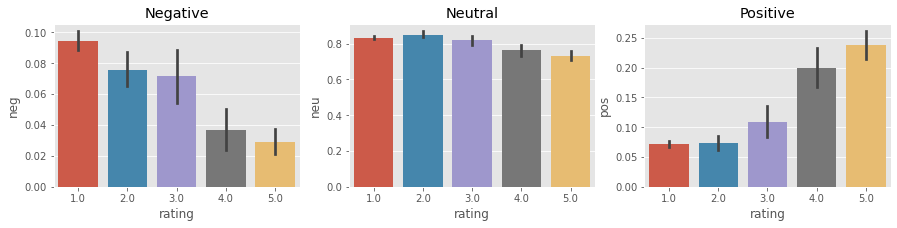

In [336]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

sns.barplot(data=vaders, x= 'rating', y='neg', ax=axs[0])
sns.barplot(data=vaders, x= 'rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x= 'rating', y='pos', ax=axs[2])

axs[2].set_title('Positive')
axs[1].set_title('Neutral')
axs[0].set_title('Negative')

In [337]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [338]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [339]:
## run for roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'reberta_pos': scores[2]
}

print(scores_dict)

{'roberta_neg': 0.56655604, 'roberta_neu': 0.37516367, 'reberta_pos': 0.05828028}


In [340]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'reberta_pos': scores[2]
    }
    return scores_dict
    

In [341]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['New_ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"broke for id {myid}")

  0%|          | 0/760 [00:00<?, ?it/s]

In [342]:
both

{'vader_neg': 0.131,
 'vader_neu': 0.869,
 'vader_pos': 0.0,
 'vader_compound': -0.3089,
 'roberta_neg': 0.9433299,
 'roberta_neu': 0.052869838,
 'reberta_pos': 0.003800229}

In [344]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': "New_ID"})
result_df = result_df.merge(df, how='left')

In [345]:
result_df.head()

,New_ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,reberta_pos,name,location,rating,review,year,month,day
0,0,0.000,0.797,0.203,0.8991,0.001901,0.008860,0.989239,Helen,"Wichita Falls, TX",5.0,Amber and LaDonna at the Starbucks on Southwes...,2023,9,13
1,1,0.101,0.757,0.142,0.7344,0.023795,0.058799,0.917406,Courtney,"Apopka, FL",5.0,at the Starbucks by the fire station on 436 i...,2023,7,16
2,2,0.088,0.773,0.139,0.4215,0.012945,0.041630,0.945425,Daynelle,"Cranberry Twp, PA",5.0,I just wanted to go out of my way to recognize...,2023,7,5
3,3,0.086,0.691,0.223,0.9232,0.007707,0.029689,0.962604,Taylor,"Seattle, WA",5.0,Me and my friend were at Starbucks and my card...,2023,5,26
4,4,0.000,0.669,0.331,0.9793,0.001388,0.011615,0.986997,Tenessa,"Gresham, OR",5.0,Im on this kick of drinking 5 cups of warm wat...,2023,1,22


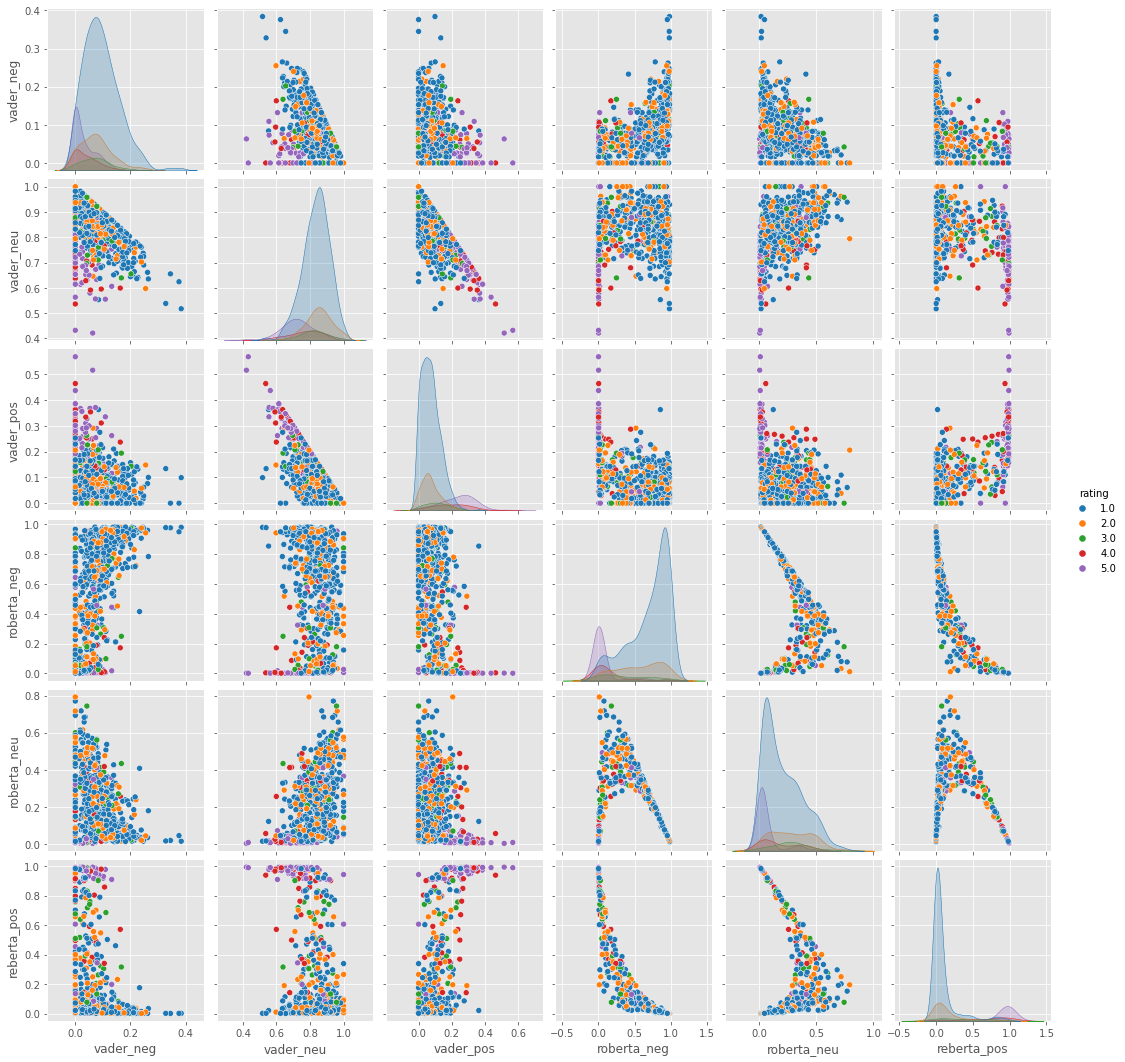

In [347]:
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'reberta_pos'],
             hue='rating',
             palette='tab10')
plt.show()

In [349]:
result_df.query('rating == 1').sort_values('reberta_pos', ascending=False)['review'].values[0]

'I purchased a ham tomato and cheese sandwich from a Starbucks in Hong Kong The sandwich I bought looked great in the display cabinet three layers of the advertised bits promising to be as delicious as I was hungry'

In [351]:
result_df.query('rating == 1').sort_values('vader_pos', ascending=False)['review'].values[0]

'I have been a loyal customer for 10 yrshowever Ive won multiple prizes on the most recent Starbucks app game but the prizes dont get delivered to my account Customer service didnt know how to help Ive spent money to play the game trying to win prizes but never see the prizes that Ive already won FRAUD Dont fall for it screenshots dont help either It needs the reward to be displayed as in barcode scan Im not spending in Starbucks anymore Its brand of integrity is very poor'

In [353]:
result_df.query('rating == 5').sort_values('roberta_neg', ascending=False)['review'].values[0]

'I work in the Jersey Gardens mall this Starbucks open when the entire mall opens I never been to a Starbucks that doesnt open early They also dont do order pick up so not only can I not get my items before going into my job when they open I have to wait on that long line with all the workers whos been waiting for them to open and the million of other people who is shopping Then not only that they never have anything They are always sold out Its horrible'

In [354]:
result_df.query('rating == 5').sort_values('vader_neg', ascending=False)['review'].values[0]

'They never get your drink wrong Employees are very friendly and professional Great selection and always list calories and ingredients Not last a nice place to read and enjoy the atmosphere'

## It's look like roberta doing very well